# Blah blah blah

In [23]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt



In [8]:
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)

connection.close()

## Loading and Preprocessing Loans Encoded Data

In [9]:
clean.head()

,Rating Agency,Binary Rating,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,2,1,4,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,2,1,3,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,2,1,5,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,2,1,4,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,2,1,5,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [10]:
# Define features set
X = clean.copy()
X = X.drop(columns=['Binary Rating'])
X.head()

,Rating Agency,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,2,4,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,2,3,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,2,5,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,2,4,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,2,5,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [11]:
# Define target vector
y = clean["Binary Rating"].values.ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [16]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,607,96
Actual 1,48,1201


Accuracy Score : 0.9262295081967213
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       703
           1       0.93      0.96      0.94      1249

    accuracy                           0.93      1952
   macro avg       0.93      0.91      0.92      1952
weighted avg       0.93      0.93      0.93      1952



## Feature Importance

In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09520570705803905, 'Pre-Tax Profit Margin'),
 (0.09095535653639106, 'Long-term Debt / Capital'),
 (0.09045887350007807, 'ROI - Return On Investment'),
 (0.06686701765480275, 'ROE - Return On Equity'),
 (0.06668667492390701, 'Current Ratio'),
 (0.0652558026476725, 'Debt/Equity Ratio'),
 (0.06505024627601762, 'Net Profit Margin'),
 (0.061804863030908416, 'ROA - Return On Assets'),
 (0.051135500358185274, 'Rating Agency'),
 (0.04725965889418706, 'EBITDA Margin'),
 (0.046125179829284914, 'Gross Margin'),
 (0.04343616662295117, 'Asset Turnover'),
 (0.04025611204776603, 'EBIT Margin'),
 (0.03794530839228488, 'Return On Tangible Equity'),
 (0.03778733031305364, 'Operating Margin'),
 (0.032077946352468134, 'Sector'),
 (0.031464021766438734, 'Operating Cash Flow Per Share'),
 (0.030228233795563726, 'Free Cash Flow Per Share')]

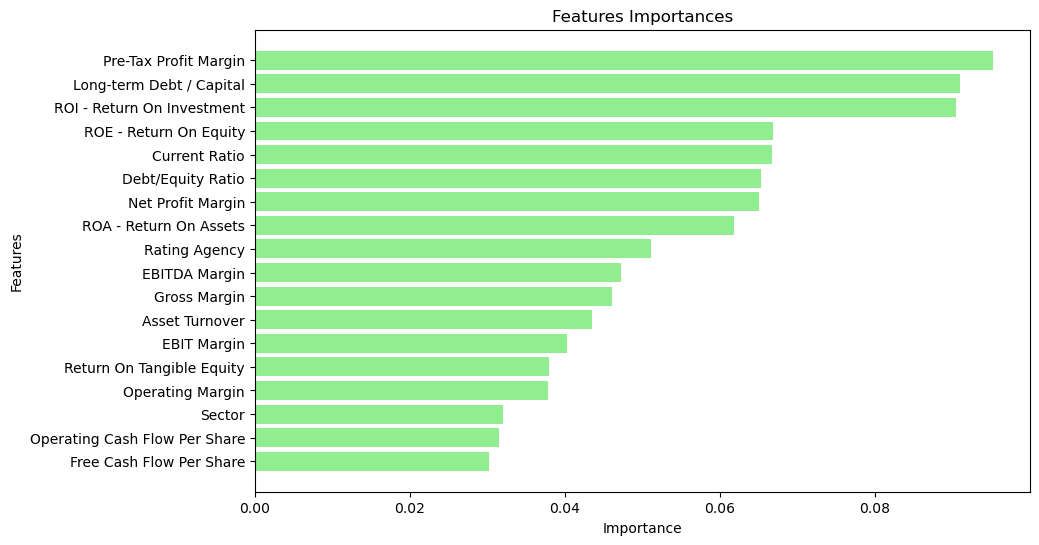

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
# importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


plt.figure(figsize=(10, 6))
plt.barh(importances_sorted.index, importances_sorted['Feature Importances'], color='lightgreen')
plt.title('Features Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.savefig('../img/importances_plot.png', bbox_inches='tight')

plt.show()